Setup:

In [207]:
import matplotlib.pyplot as plt

In [208]:
benchmark_base_path = r'C:\Users\huda\Documents\GitHub\scheduling_model\code\external_test_data\FJSSPinstances\\'
path_30_min = r'C:\Users\huda\Documents\GitHub\scheduling_model\code\reworked_data_model\results\gurobi_results\formatted_results\30_min.txt'
path_60_min = r'C:\Users\huda\Documents\GitHub\scheduling_model\code\reworked_data_model\results\gurobi_results\formatted_results\60_min.txt'

In [209]:
file = open(path_30_min, 'r')
file_content = file.readlines()
results_30_min = [x.split(';') for x in file_content]
file = open(path_60_min, 'r')
file_content = file.readlines()
results_60_min = [x.split(';') for x in file_content]

In [210]:
def read_benchmark_file(source, instance):
    if source.startswith('0'):
        target_file = f'Behnke{instance}.fjs'
    elif source.startswith('1'):
        target_file = f'BrandimarteMk{instance}.fjs'
    elif source.startswith('2a'):
        target_file = f'HurinkSdata{instance}.fjs'
    elif source.startswith('2b'):
        target_file = f'HurinkEdata{instance}.fjs'
    elif source.startswith('2c'):
        target_file = f'HurinkRdata{instance}.fjs'
    elif source.startswith('2d'):
        target_file = f'HurinkVdata{instance}.fjs'
    elif source.startswith('3'):
        target_file = f'DPpaulli{instance}.fjs'
    elif source.startswith('4'):
        target_file = f'ChambersBarnes{instance}.fjs'
    elif source.startswith('5'):
        target_file = f'Kacem{instance}.fjs'
    elif source.startswith('6'):
        target_file = f'Fattahi{instance}.fjs'
    path = benchmark_base_path + f'{source}\\{target_file}'
    return open(path, 'r').readlines()

In [211]:
def translate(columns, limit):
    line = dict()
    line['source'] = columns[0]
    line['instance'] = int(columns[1])
    line['best_objective'] = float(columns[2])
    line['gap'] = float(columns[3])
    line['status'] = int(columns[4])
    line['n_explored'] = int(float(columns[5]))
    line['runtime'] = float(columns[6])
    line['overall_runtime'] = float(columns[7])
    line['setup_time'] = line['overall_runtime'] - line['runtime']
    # add information about the benchmark instance
    benchmark_file = read_benchmark_file(line['source'], line['instance'])
    benchmark_system = benchmark_file[0].split(' ')
    line['n_machines'] = int(benchmark_system[1])
    line['n_jobs'] = int(benchmark_system[0])
    line['average_workstations_per_operation'] = float(benchmark_system[2])
    jobs = benchmark_file[1:]
    line['n_operations'] = sum([int(x.split(' ')[0]) for x in jobs])
    line['average_operations_per_job'] = line['n_operations'] / line['n_jobs']
    line['beta_flexibility'] = line['average_workstations_per_operation']/line['n_machines']
    line['approximate_max_dissimilarity'] = line['n_operations'] + line['average_operations_per_job'] * line['average_workstations_per_operation']
    line['limit'] = limit
    return line    

In [212]:
data_30 = []
data_60 = []

for columns in results_30_min[1:]:
    line = translate(columns, 30)
    data_30.append(line)
for columns in results_60_min[1:]:
    line = translate(columns, 60)
    data_60.append(line)

In [213]:
import pandas as pd
data_all = data_30.copy()
data_all.extend(data_60)
df = pd.DataFrame.from_dict(data_all)

Start working with the data below:

In [214]:
df

,source,instance,best_objective,gap,status,n_explored,runtime,overall_runtime,setup_time,n_machines,n_jobs,average_workstations_per_operation,n_operations,average_operations_per_job,beta_flexibility,approximate_max_dissimilarity,limit
0,0_BehnkeGeiger,1,90.000000,0.000000,2,158083,309.802,309.990282,0.188282,20,10,6.08,50,5.000000,0.304000,80.400000,30
1,0_BehnkeGeiger,2,91.000000,0.000000,2,175969,220.011,220.229788,0.218788,20,10,6.72,50,5.000000,0.336000,83.600000,30
2,0_BehnkeGeiger,3,91.000000,0.000000,2,87914,298.821,299.008287,0.187287,20,10,6.24,50,5.000000,0.312000,81.200000,30
3,0_BehnkeGeiger,4,97.000000,0.041237,9,2042111,1800.017,1800.251823,0.234823,20,10,6.64,50,5.000000,0.332000,83.200000,30
4,0_BehnkeGeiger,5,91.000000,0.032967,9,2708987,1800.014,1800.357862,0.343863,20,10,6.16,50,5.000000,0.308000,80.800000,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,4_ChambersBarnes,19,1125.000000,0.060148,9,284364,3600.096,3600.533674,0.437673,18,15,1.00,225,15.000000,0.055556,240.000000,60
634,4_ChambersBarnes,20,1169.000000,0.000000,2,1023678,3525.489,3525.879204,0.390204,16,15,1.00,225,15.000000,0.062500,240.000000,60
635,5_Kacem,4,10.999999,0.090909,9,1457988,3600.018,3601.064883,1.046883,10,15,10.00,56,3.733333,1.000000,93.333333,60
636,6_Fattahi,19,1080.000000,0.135185,9,4490995,3600.003,3600.799232,0.796232,8,11,2.30,44,4.000000,0.287500,53.200000,60


In [215]:
df.groupby('limit')['limit'].count()

limit
30    402
60    236
Name: limit, dtype: int64

In [216]:
print(f'30: {df[df["limit"] == 30].groupby("status")["status"].count()}')
print(f'60: {df[df["limit"] == 60].groupby("status")["status"].count()}')
print(f'All: {df.groupby("status")["status"].count()}')

30: status
2    166
9    236
Name: status, dtype: int64
60: status
2      7
9    229
Name: status, dtype: int64
All: status
2    173
9    465
Name: status, dtype: int64


In [217]:
df.loc[(df['limit'] == 60) & (df['status'] == 2)]

,source,instance,best_objective,gap,status,n_explored,runtime,overall_runtime,setup_time,n_machines,n_jobs,average_workstations_per_operation,n_operations,average_operations_per_job,beta_flexibility,approximate_max_dissimilarity,limit
436,0_BehnkeGeiger,41,87.0,0.000000e+00,2,233744,3163.439,3164.594530,1.155530,60,10,22.24,50,5.0,0.370667,161.2,60
437,0_BehnkeGeiger,42,87.0,5.685491e-07,2,1436937,3248.429,3248.803315,0.374315,60,10,15.68,50,5.0,0.261333,128.4,60
454,1_Brandimarte,4,60.0,3.166667e-09,2,1322241,2200.407,2201.266069,0.859069,8,15,2.00,90,6.0,0.250000,102.0,60
478,2a_Hurink_sdata,25,927.0,0.000000e+00,2,6863699,2192.457,2194.799641,2.342641,10,15,1.00,150,10.0,0.100000,160.0,60
490,2a_Hurink_sdata,39,1268.0,0.000000e+00,2,234465,1866.507,1867.006972,0.499972,15,15,1.00,225,15.0,0.066667,240.0,60
493,2a_Hurink_sdata,42,1233.0,0.000000e+00,2,5849657,3143.625,3144.421495,0.796495,15,15,1.00,225,15.0,0.066667,240.0,60
634,4_ChambersBarnes,20,1169.0,0.000000e+00,2,1023678,3525.489,3525.879204,0.390204,16,15,1.00,225,15.0,0.062500,240.0,60


In [218]:
# check the benchmarks that were successful after 60 minutes but not after 30 minutes to see their gap after 30 minutes
#NOTE: there is probably a way easier way to do this query based on the previous results
success_60 = df.loc[(df['limit'] == 30) & (((df['source'] == '0_BehnkeGeiger') & (df['instance'] == 41)) | ((df['source'] == '0_BehnkeGeiger') & (df['instance'] == 42)) | ((df['source'] == '1_Brandimarte') & (df['instance'] == 4)) | ((df['source'] == '2a_Hurink_sdata') & (df['instance'] == 25)) | ((df['source'] == '2a_Hurink_sdata') & (df['instance'] == 39)) | ((df['source'] == '2a_Hurink_sdata') & (df['instance'] == 42)) | ((df['source'] == '4_ChambersBarnes') & (df['instance'] == 20)))]
success_60

,source,instance,best_objective,gap,status,n_explored,runtime,overall_runtime,setup_time,n_machines,n_jobs,average_workstations_per_operation,n_operations,average_operations_per_job,beta_flexibility,approximate_max_dissimilarity,limit
40,0_BehnkeGeiger,41,87.000000,0.057471,9,114528,1800.042,1801.148670,1.106670,60,10,22.24,50,5.0,0.370667,161.2,30
41,0_BehnkeGeiger,42,86.999999,0.011494,9,712018,1800.034,1800.424584,0.390584,60,10,15.68,50,5.0,0.261333,128.4,30
63,1_Brandimarte,4,60.000000,0.033333,9,1074732,1800.020,1800.223281,0.203281,8,15,2.00,90,6.0,0.250000,102.0,30
99,2a_Hurink_sdata,25,927.000000,0.043150,9,5579887,1800.037,1800.412106,0.375106,10,15,1.00,150,10.0,0.100000,160.0,30
113,2a_Hurink_sdata,39,1268.000000,0.042587,9,223359,1800.101,1800.522278,0.421278,15,15,1.00,225,15.0,0.066667,240.0,30
116,2a_Hurink_sdata,42,1233.000000,0.066504,9,3205012,1800.047,1800.625239,0.578239,15,15,1.00,225,15.0,0.066667,240.0,30
376,4_ChambersBarnes,20,1170.000000,0.068376,9,703616,1800.079,1800.423013,0.344013,16,15,1.00,225,15.0,0.062500,240.0,30


In [219]:
print(f'Mean Gap: {success_60["gap"].mean()}')
print(f'Var Gap: {success_60["gap"].var()}')
print(f'Std Gap: {success_60["gap"].std()}')
print(f'Max Gap: {success_60["gap"].max()}')
print(f'Min Gap: {success_60["gap"].min()}')

Mean Gap: 0.04613086678185619
Var Gap: 0.000403909343113591
Std Gap: 0.02009749594137516
Max Gap: 0.06837606837606641
Min Gap: 0.011494244358202708


In [220]:
grouped_df_30 = df[df["limit"] == 30].groupby("status")
grouped_df_60 = df[df["limit"] == 60].groupby("status")

In [221]:
def print_data(df):
    print(f"# Machines: {df['n_machines'].mean()}")
    print(f"# Jobs: {df['n_jobs'].mean()}")
    print(f"# Operations: {df['n_operations'].mean()}")
    print(f"# Flexibility: {df['beta_flexibility'].mean()}")
    print(f"# Approx.Max:Dis.: {df['approximate_max_dissimilarity'].mean()}")


In [222]:
print('30 Minutes:')
print_data(grouped_df_30)


30 Minutes:
# Machines: status
2    10.753012
9    15.453390
Name: n_machines, dtype: float64
# Jobs: status
2     9.885542
9    25.237288
Name: n_jobs, dtype: float64
# Operations: status
2     89.180723
9    192.974576
Name: n_operations, dtype: float64
# Flexibility: status
2    0.273660
9    0.277359
Name: beta_flexibility, dtype: float64
# Approx.Max:Dis.: status
2    111.164970
9    220.996787
Name: approximate_max_dissimilarity, dtype: float64


In [223]:
print('60 Minutes:')
print_data(grouped_df_60)

60 Minutes:
# Machines: status
2    26.285714
9    15.122271
Name: n_machines, dtype: float64
# Jobs: status
2    13.571429
9    25.593886
Name: n_jobs, dtype: float64
# Operations: status
2    145.000000
9    194.441048
Name: n_operations, dtype: float64
# Flexibility: status
2    0.168262
9    0.280694
Name: beta_flexibility, dtype: float64
# Approx.Max:Dis.: status
2    181.657143
9    222.199309
Name: approximate_max_dissimilarity, dtype: float64


In [224]:
import seaborn as sns

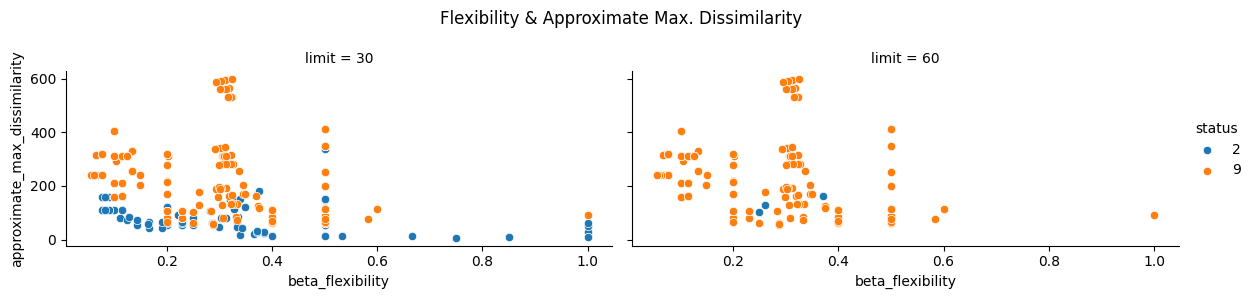

In [235]:
fg = sns.FacetGrid(data=df, hue='status',  aspect=2, col='limit')
fg.fig.suptitle('Flexibility & Approximate Max. Dissimilarity')
fg.map(sns.scatterplot, 'beta_flexibility', 'approximate_max_dissimilarity').add_legend() #NOTE: used sns.scatterplot instead of plt.scatter

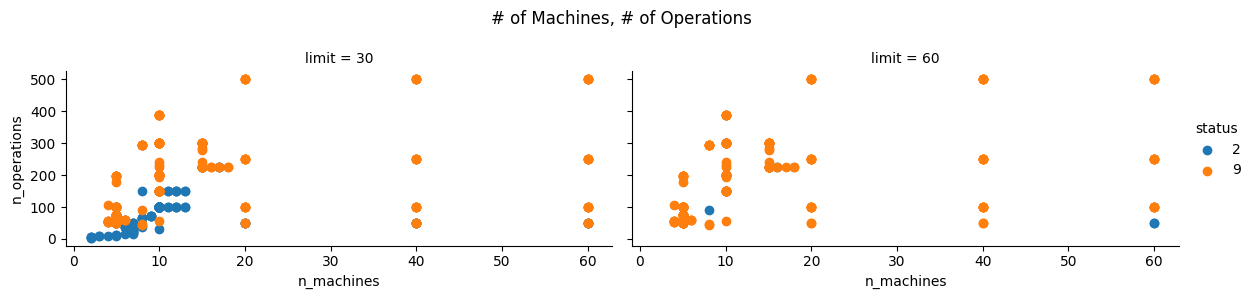

In [226]:
fg = sns.FacetGrid(data=df, hue='status', aspect=2, col='limit')
fg.fig.suptitle("# Operations, Flexibility")
fg.map_dataframe(sns.histplot, x='beta_flexibility').add_legend()

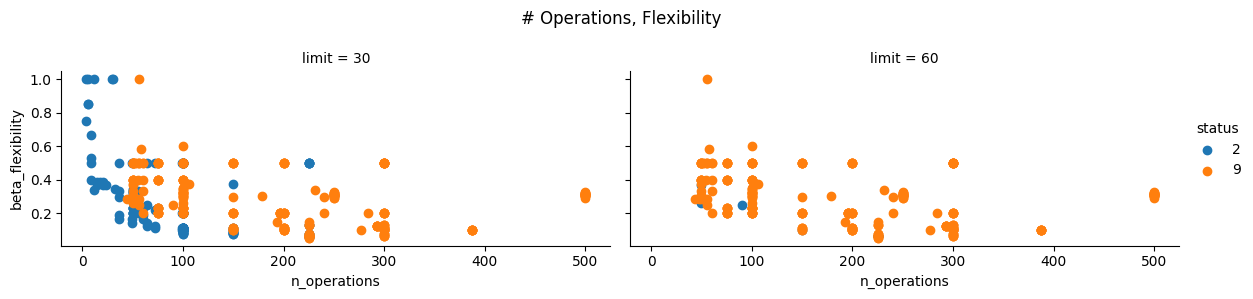

In [227]:
fg = sns.FacetGrid(data=df, hue='status', aspect=2, col='limit')
fg.fig.suptitle("# Operations, Flexibility")
fg.map(plt.scatter, 'n_operations', 'beta_flexibility').add_legend()

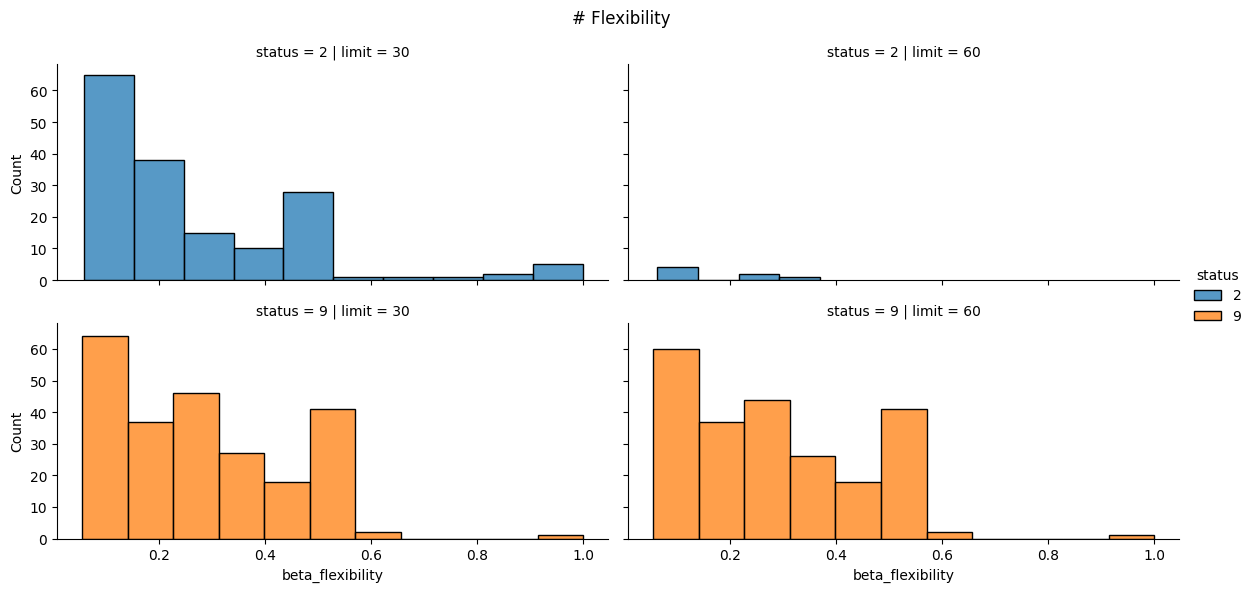

In [251]:
fg = sns.FacetGrid(data=df, hue='status', aspect=2, col='limit', row='status')
fg.fig.suptitle("# Flexibility")
fg.map_dataframe(sns.histplot, x='beta_flexibility').add_legend()

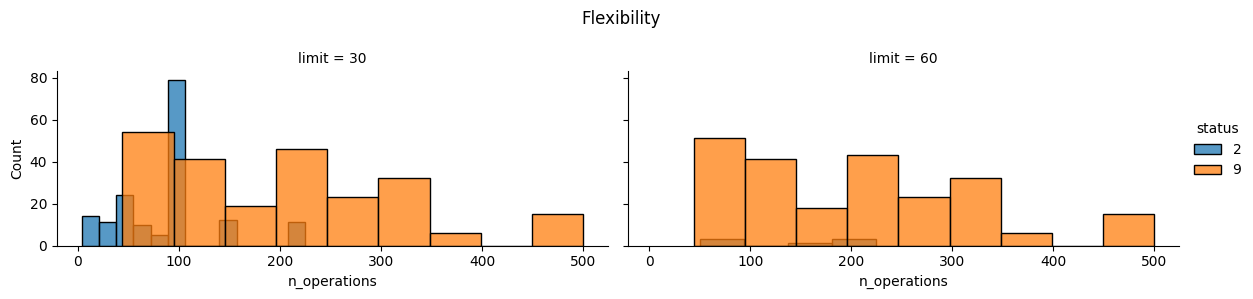

In [248]:
fg = sns.FacetGrid(data=df, hue='status', aspect=2, col='limit')
fg.fig.suptitle("Flexibility")
fg.map_dataframe(sns.histplot, x='n_operations').add_legend()

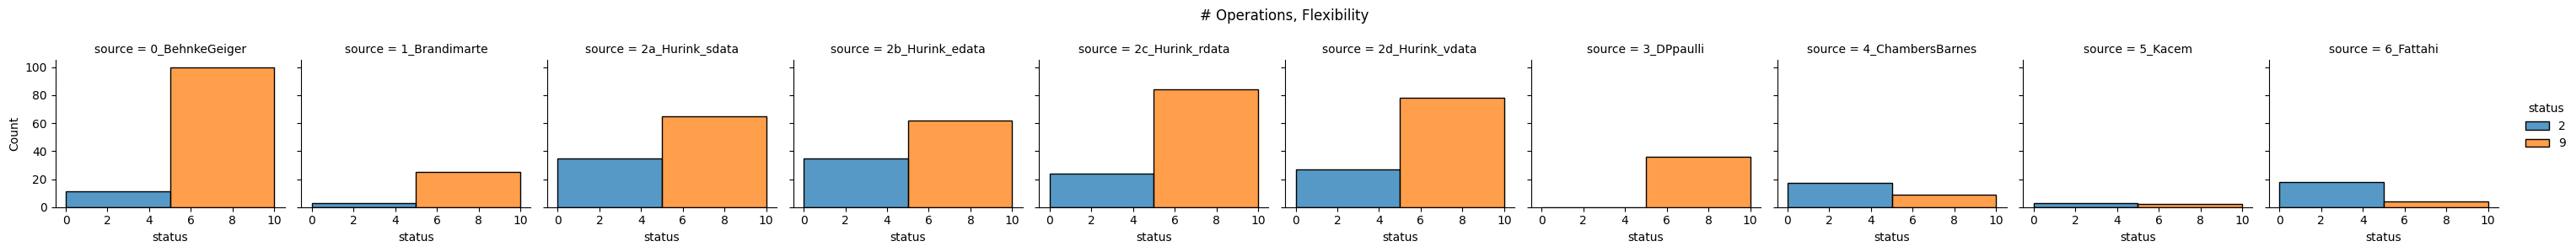

In [249]:
fg = sns.FacetGrid(data=df, hue='status', aspect=1, col='source')
fg.fig.suptitle("# Operations, Flexibility")
fg.map_dataframe(sns.histplot, x='status', binwidth=5, binrange=(0, 10)).add_legend()